In [2]:
using HypothesisTests, StatsFuns, Gadfly, Colors, RCall
rcopy("library(BayesLogit)");
include("/home/seth/code/polyagamma/polygamma.jl");


Attaching package: ‘dplyr’

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

data.table 1.9.6  For help type ?data.table or https://github.com/Rdatatable/data.table/wiki
The fastest way to learn (by data.table authors): https://www.datacamp.com/courses/data-analysis-the-data-table-way

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, last



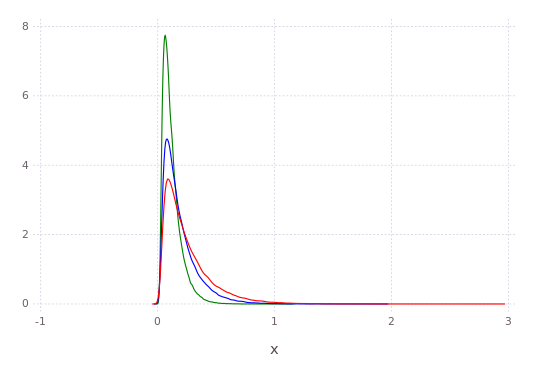

In [2]:
plot(layer(x=[rpolyagamma(0.0) for i = 1:1e5],Geom.density,Theme(default_color=colorant"red")),
layer(x=[rpolyagamma(2.0) for i = 1:1e5],Geom.density,Theme(default_color=colorant"blue")),
layer(x=[rpolyagamma(4.0) for i = 1:1e5],Geom.density,Theme(default_color=colorant"green")))

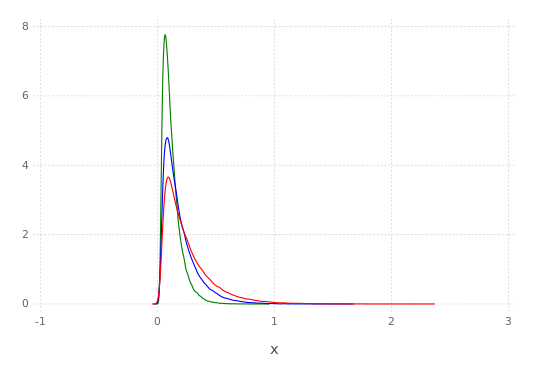

In [16]:
plot(layer(x=rcopy("rpg.devroye(1e5,z=0)"),Geom.density,Theme(default_color=colorant"red")),
layer(x=rcopy("rpg.devroye(1e5,z=2)"),Geom.density,Theme(default_color=colorant"blue")),
layer(x=rcopy("rpg.devroye(1e5,z=4)"),Geom.density,Theme(default_color=colorant"green")))

In [57]:
ApproximateTwoSampleKSTest([rpolyagamma(0.0) for i = 1:1e5],rcopy("rpg.devroye(1e5,z=0.0)"))

Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0029800000000000013

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7662722532044661 (not significant)

Details:
    number of observations:   [100000,100000]
    KS-statistic:              0.6663482572949376


In [60]:
ApproximateTwoSampleKSTest([rpolyagamma(4.0) for i = 1:1e5],rcopy("rpg.devroye(1e5,z=4.0)"))

Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0023799999999999984

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9395703527118887 (not significant)

Details:
    number of observations:   [100000,100000]
    KS-statistic:              0.5321841786449496


In [69]:
@time for i = 1:1e6 rpolyagamma(1.0); end

  0.271424 seconds (3.48 M allocations: 144.619 MB, 9.27% gc time)


In [5]:
@time rcopy("rpg.devroye(1e6,z=1.0)");

  0.461309 seconds (3.00 M allocations: 99.183 MB, 7.78% gc time)
